In [1]:

import numpy as np
from util.plot import plot_cdf,color_list,plot_cdf_sub,plot_line
from collections import defaultdict,Counter
import matplotlib.pyplot as plt
import json

In [2]:
dir_input="/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_8/data"
topo_type_cur="_topology_flows_dctcp"
lr=10
data_list=[]
for shard in np.arange(1000):
    for n_flows in [10000]:
        for key_tag in [32]:
            for shard_seed in [0]:
                spec=f"{shard}/ns3"
                dir_input_tmp = f"{dir_input}/{spec}"
                
                fid = np.load(f'{dir_input}/{spec}/fid{topo_type_cur}.npy')
                
                if len(fid)==len(set(fid)) and np.all(fid[:-1] <= fid[1:]) and len(fid) % n_flows == 0:
                    data_list.append((spec,topo_type_cur,key_tag))
                else:
                    print(f"fid not valid: {spec}, {len(fid)}, {len(set(fid))}, {np.all(fid[:-1] <= fid[1:])}, {len(fid) % n_flows}")
print(f"len(data_list): {len(data_list)}")

fid not valid: 56/ns3, 9998, 9998, True, 9998
fid not valid: 106/ns3, 9996, 9996, True, 9996
fid not valid: 300/ns3, 9998, 9998, True, 9998
fid not valid: 378/ns3, 9997, 9997, True, 9997
fid not valid: 980/ns3, 9997, 9997, True, 9997
len(data_list): 995


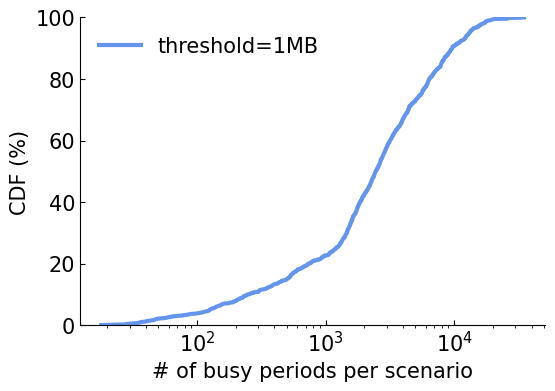

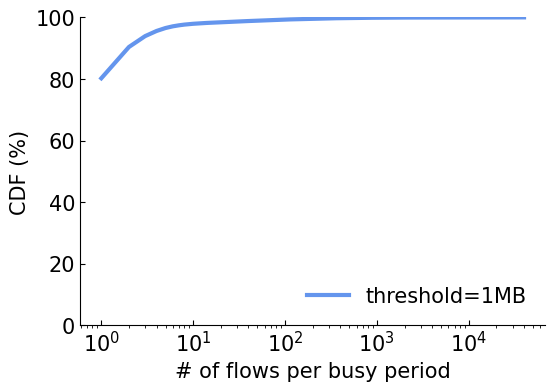

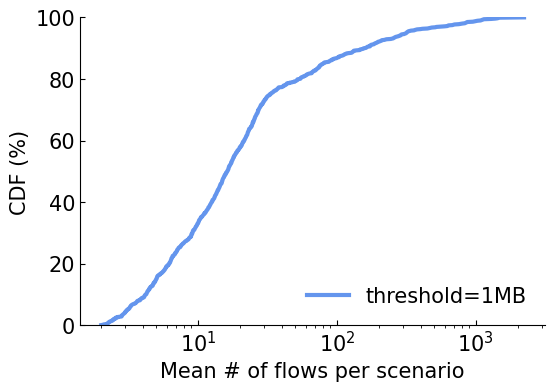

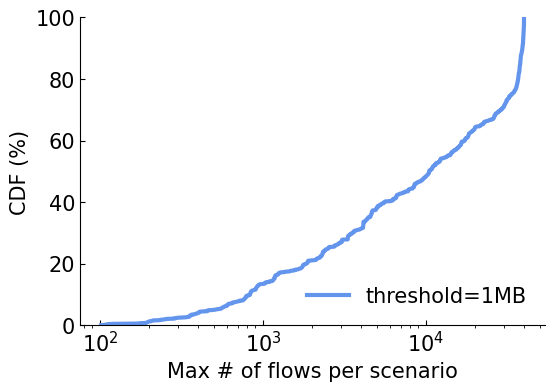

In [3]:
num_period_all=defaultdict(list)
len_per_period_all=defaultdict(list)
len_per_period_all_mean=defaultdict(list)
len_per_period_all_max=defaultdict(list)
flow_size_threshold_list=[100000000]
flow_size_threshold_list_label=["1MB", "$\infty$"]
for spec_idx,(spec,topo_type,_) in enumerate(data_list):
    input_tmp=f"{dir_input}/{spec}"
    # Read the log file
    for flow_size_threshold_idx, flow_size_threshold in enumerate(flow_size_threshold_list):
        key_tag=f"threshold={flow_size_threshold_list_label[flow_size_threshold_idx]}"
        busy_periods=np.load(f'{input_tmp}/period{topo_type}_t{flow_size_threshold}.npy', allow_pickle=True)
        busy_periods=[np.array(period) for period in busy_periods]
        
        num_period_all[key_tag].append(len(busy_periods))
        
        # len_per_period = np.array([int(period[1])-int(period[0])+1 for period in busy_periods])
        len_per_period = np.array([len(period) for period in busy_periods])
        len_per_period_all[key_tag].extend(len_per_period)
        len_per_period_all_mean[key_tag].append(len_per_period.mean())
        len_per_period_all_max[key_tag].append(len_per_period.max())

legend_list=[f'{key_tag}' for key_tag in len_per_period_all.keys()]

plot_data=[np.array(num_period_all[key_tag]) for key_tag in len_per_period_all.keys()]
fig_idx=0
plot_cdf(plot_data,None,legend_list,f'# of busy periods per scenario',legend_font=15,group_size=len(legend_list),loc=2,rotate_xaxis=False,log_switch=True,fig_idx=fig_idx)
fig_idx+=1

plot_data=[np.array(len_per_period_all[key_tag]) for key_tag in len_per_period_all.keys()]
plot_cdf(plot_data,None,legend_list,f'# of flows per busy period',legend_font=15,group_size=len(legend_list),loc=4,rotate_xaxis=False,log_switch=True,fig_idx=fig_idx)
fig_idx+=1

plot_data=[np.array(len_per_period_all_mean[key_tag]) for key_tag in len_per_period_all.keys()]
plot_cdf(plot_data,None,legend_list,f'Mean # of flows per scenario',legend_font=15,group_size=len(legend_list),loc=4,rotate_xaxis=False,log_switch=True,fig_idx=fig_idx)
fig_idx+=1

max_index=[np.argmax(len_per_period_all_max[key_tag]) for key_tag in len_per_period_all.keys()]
plot_data=[np.array(len_per_period_all_max[key_tag]) for key_tag in len_per_period_all.keys()]
plot_cdf(plot_data,None,legend_list,f'Max # of flows per scenario',legend_font=15,group_size=len(legend_list),loc=4,rotate_xaxis=False,log_switch=True,fig_idx=fig_idx)
fig_idx+=1

In [9]:
dir_input="/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_8/data"
topo_type_cur="_topology_flows_dctcp"
lr=10
data_list=[]
config_file="/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_8/spec/dctcp_sync.mix.json"
config=json.load(open(config_file))
for shard in np.arange(1000):
    for n_flows in [40000]:
        for key_tag in [32]:
            for shard_seed in [0]:
                spec=f"{shard}/ns3"
                dir_input_tmp = f"{dir_input}/{spec}"
                
                fid = np.load(f'{dir_input}/{spec}/fid{topo_type_cur}.npy')
                
                key_tag=config[shard].get("spatial").split("/")[-1]
                # max_load=float(stats.item().get("load_bottleneck_target"))
                # flow_size_sigma=float(stats.item().get("size_sigma_candidate"))
                
                # if flow_size_dist!='lognorm':continue
                # if max_load>0.8: continue
                # if flow_size_sigma<15000: continue
                
                
                # if max_load<0.35:
                #     key_tag='load=[20%,35%)'
                # elif max_load<0.50:
                #     key_tag='load=[35%,50%)'
                # elif max_load<=0.65:
                #     key_tag='load=[50%,65%)'
                # else:
                #     key_tag='load=[65%,80%)'
                
                # if flow_size_sigma<15000:
                #     key_tag='load=[5K,15K)'
                # elif flow_size_sigma<25000:
                #     key_tag='load=[15K,25K)'
                # elif flow_size_sigma<35000:
                #     key_tag='load=[25K,35K)'
                # else:
                #     key_tag='load=[35K,50K)'
                # key_tag="one"
                if len(fid)==len(set(fid)) and np.all(fid[:-1] <= fid[1:]) and len(fid) % n_flows == 0:
                    data_list.append((spec,topo_type_cur,key_tag))
                else:
                    print(f"fid not valid: {spec}, {len(fid)}, {len(set(fid))}, {np.all(fid[:-1] <= fid[1:])}, {len(fid) % n_flows}")
print(f"len(data_list): {len(data_list)}")

fid not valid: 469/ns3, 39992, 39992, True, 39992
len(data_list): 999


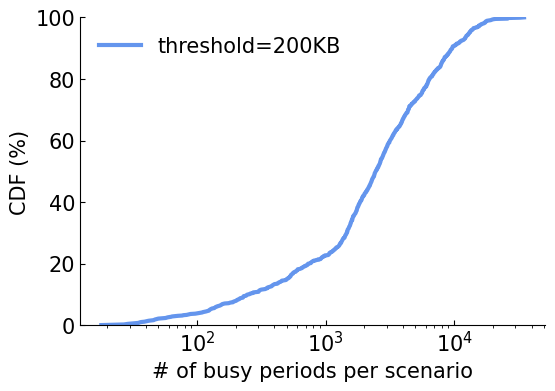

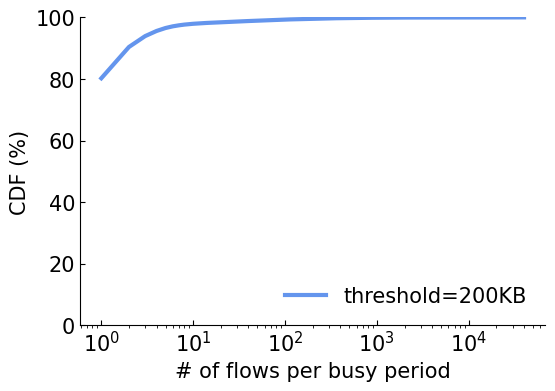

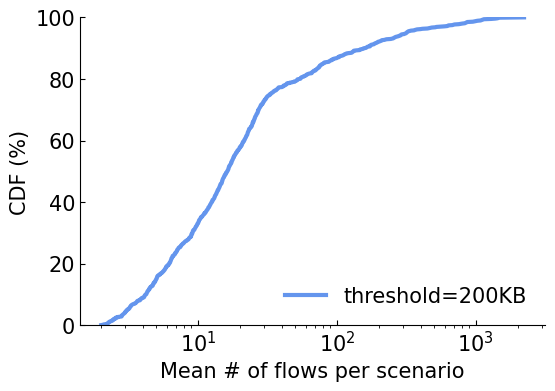

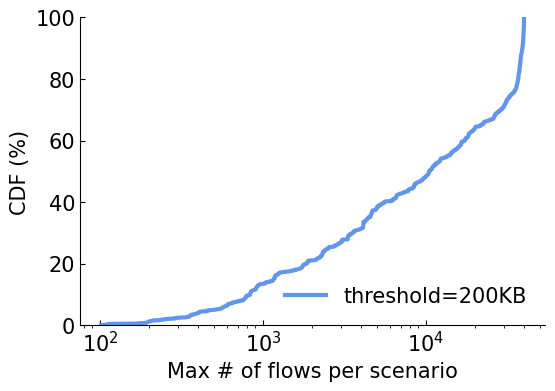

In [7]:
num_period_all=defaultdict(list)
len_per_period_all=defaultdict(list)
len_per_period_all_mean=defaultdict(list)
len_per_period_all_max=defaultdict(list)
flow_size_threshold_list=[100000000]
flow_size_threshold_list_label=["200KB", "1MB", "$\infty$"]
for spec_idx,(spec,topo_type,_) in enumerate(data_list):
    input_tmp=f"{dir_input}/{spec}"
    # Read the log file
    for flow_size_threshold_idx, flow_size_threshold in enumerate(flow_size_threshold_list):
        key_tag=f"threshold={flow_size_threshold_list_label[flow_size_threshold_idx]}"
        busy_periods=np.load(f'{input_tmp}/period{topo_type}_t{flow_size_threshold}.npy', allow_pickle=True)
        busy_periods=[np.array(period) for period in busy_periods]
        
        num_period_all[key_tag].append(len(busy_periods))
        
        # len_per_period = np.array([int(period[1])-int(period[0])+1 for period in busy_periods])
        len_per_period = np.array([len(period) for period in busy_periods])
        len_per_period_all[key_tag].extend(len_per_period)
        len_per_period_all_mean[key_tag].append(len_per_period.mean())
        len_per_period_all_max[key_tag].append(len_per_period.max())

legend_list=[f'{key_tag}' for key_tag in len_per_period_all.keys()]

plot_data=[np.array(num_period_all[key_tag]) for key_tag in len_per_period_all.keys()]
fig_idx=0
plot_cdf(plot_data,None,legend_list,f'# of busy periods per scenario',legend_font=15,group_size=len(legend_list),loc=2,rotate_xaxis=False,log_switch=True,fig_idx=fig_idx)
fig_idx+=1

plot_data=[np.array(len_per_period_all[key_tag]) for key_tag in len_per_period_all.keys()]
plot_cdf(plot_data,None,legend_list,f'# of flows per busy period',legend_font=15,group_size=len(legend_list),loc=4,rotate_xaxis=False,log_switch=True,fig_idx=fig_idx)
fig_idx+=1

plot_data=[np.array(len_per_period_all_mean[key_tag]) for key_tag in len_per_period_all.keys()]
plot_cdf(plot_data,None,legend_list,f'Mean # of flows per scenario',legend_font=15,group_size=len(legend_list),loc=4,rotate_xaxis=False,log_switch=True,fig_idx=fig_idx)
fig_idx+=1

max_index=[np.argmax(len_per_period_all_max[key_tag]) for key_tag in len_per_period_all.keys()]
plot_data=[np.array(len_per_period_all_max[key_tag]) for key_tag in len_per_period_all.keys()]
plot_cdf(plot_data,None,legend_list,f'Max # of flows per scenario',legend_font=15,group_size=len(legend_list),loc=4,rotate_xaxis=False,log_switch=True,fig_idx=fig_idx)
fig_idx+=1

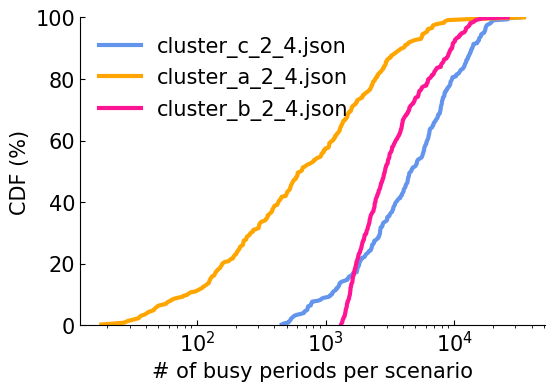

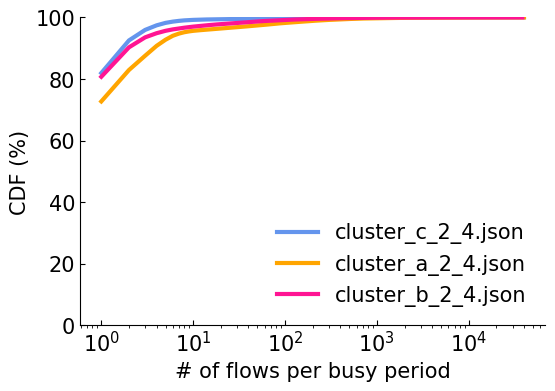

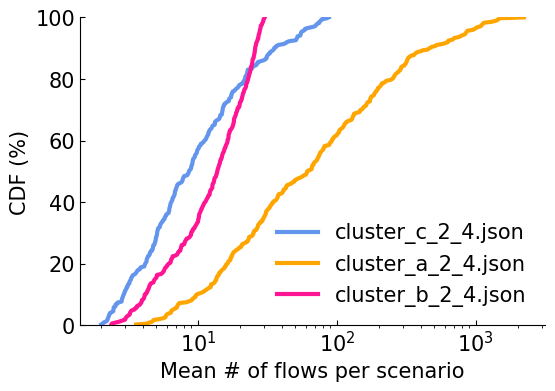

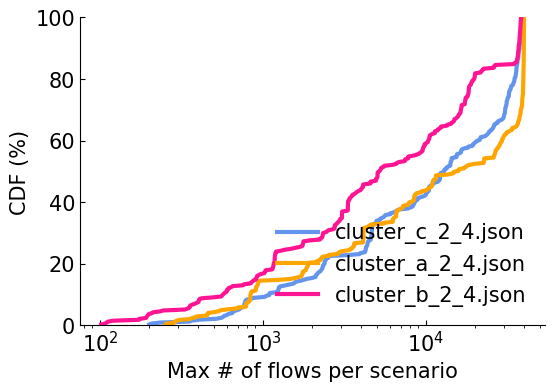

In [10]:
num_period_all=defaultdict(list)
len_per_period_all=defaultdict(list)
len_per_period_all_mean=defaultdict(list)
len_per_period_all_max=defaultdict(list)
for spec_idx,(spec,topo_type,key_tag) in enumerate(data_list):
    input_tmp=f"{dir_input}/{spec}"
    # Read the log file
    busy_periods=np.load(f'{input_tmp}/period{topo_type}_t100000000.npy', allow_pickle=True)
    
    num_period_all[key_tag].append(len(busy_periods))
    
    # len_per_period = np.array([int(period[1])-int(period[0])+1 for period in busy_periods])
    len_per_period = np.array([len(period) for period in busy_periods])
    len_per_period_all[key_tag].extend(len_per_period)
    len_per_period_all_mean[key_tag].append(len_per_period.mean())
    len_per_period_all_max[key_tag].append(len_per_period.max())

legend_list=[f'{key_tag}' for key_tag in len_per_period_all.keys()]

plot_data=[np.array(num_period_all[key_tag]) for key_tag in len_per_period_all.keys()]
fig_idx=0
plot_cdf(plot_data,None,legend_list,f'# of busy periods per scenario',legend_font=15,group_size=len(legend_list),loc=2,rotate_xaxis=False,log_switch=True,fig_idx=fig_idx)
fig_idx+=1

plot_data=[np.array(len_per_period_all[key_tag]) for key_tag in len_per_period_all.keys()]
plot_cdf(plot_data,None,legend_list,f'# of flows per busy period',legend_font=15,group_size=len(legend_list),loc=4,rotate_xaxis=False,log_switch=True,fig_idx=fig_idx)
fig_idx+=1

plot_data=[np.array(len_per_period_all_mean[key_tag]) for key_tag in len_per_period_all.keys()]
plot_cdf(plot_data,None,legend_list,f'Mean # of flows per scenario',legend_font=15,group_size=len(legend_list),loc=4,rotate_xaxis=False,log_switch=True,fig_idx=fig_idx)
fig_idx+=1

max_index=[np.argmax(len_per_period_all_max[key_tag]) for key_tag in len_per_period_all.keys()]
plot_data=[np.array(len_per_period_all_max[key_tag]) for key_tag in len_per_period_all.keys()]
plot_cdf(plot_data,None,legend_list,f'Max # of flows per scenario',legend_font=15,group_size=len(legend_list),loc=4,rotate_xaxis=False,log_switch=True,fig_idx=fig_idx)
fig_idx+=1

In [17]:
dir_input="/data2/lichenni/perflow_path_empirical"
topo_type="_topo-pl-x_"
lr=10
data_list=[]
for shard in np.arange(200):
    for n_flows in [2000]:
        for key_tag in [5]:
            for shard_seed in [0]:
                topo_type_cur=topo_type.replace("-x_",f"-{key_tag}_")+"s%d_i0"%(shard_seed)
                spec=f"shard{shard}_nflows{n_flows}_nhosts{key_tag}_lr{lr}Gbps"
                dir_input_tmp = f"{dir_input}/{spec}"
                
                fid = np.load(f'{dir_input}/{spec}/fid{topo_type_cur}.npy')
                
                stats = np.load(f'{dir_input}/{spec}/stats.npy', allow_pickle=True)
                flow_size_dist=stats.item().get("size_dist_candidate")
                max_load=float(stats.item().get("load_bottleneck_target"))
                
                # if max_load>0.8: continue
                key_tag=flow_size_dist
                
                # if max_load<0.35:
                #     key_tag='load=[20%,35%)'
                # elif max_load<0.50:
                #     key_tag='load=[35%,50%)'
                # elif max_load<=0.65:
                #     key_tag='load=[50%,65%)'
                # else:
                #     key_tag='load=[65%,80%)'
                
                if len(fid)==len(set(fid)) and np.all(fid[:-1] <= fid[1:]) and len(fid)%n_flows==0:
                    data_list.append((spec,topo_type_cur,key_tag))
                else:
                    print(f"fid not valid: {spec}")
print(f"len(data_list): {len(data_list)}")

len(data_list): 200


In [ ]:
num_period_all=defaultdict(list)
len_per_period_all=defaultdict(list)
len_per_period_all_mean=defaultdict(list)
len_per_period_all_max=defaultdict(list)
flow_size_threshold_list=[10000,50000,100000,1000000]
flow_size_threshold_list_label=["10KB", "50KB", "100KB", "1MB"]
for spec_idx,(spec,topo_type,_) in enumerate(data_list):
    input_tmp=f"{dir_input}/{spec}"
    # Read the log file
    for flow_size_threshold_idx, flow_size_threshold in enumerate(flow_size_threshold_list):
        key_tag=f"threshold={flow_size_threshold_list_label[flow_size_threshold_idx]}"
        busy_periods=np.load(f'{input_tmp}/period{topo_type}_t{flow_size_threshold}.npy', allow_pickle=True)
        busy_periods=[np.array(period) for period in busy_periods]
        
        num_period_all[key_tag].append(len(busy_periods))
        
        # len_per_period = np.array([int(period[1])-int(period[0])+1 for period in busy_periods])
        len_per_period = np.array([len(period) for period in busy_periods])
        len_per_period_all[key_tag].extend(len_per_period)
        len_per_period_all_mean[key_tag].append(len_per_period.mean())
        len_per_period_all_max[key_tag].append(len_per_period.max())

legend_list=[f'{key_tag}' for key_tag in len_per_period_all.keys()]

plot_data=[np.array(num_period_all[key_tag]) for key_tag in len_per_period_all.keys()]
fig_idx=0
plot_cdf(plot_data,None,legend_list,f'# of busy periods per scenario',legend_font=15,group_size=len(legend_list),loc=2,rotate_xaxis=False,log_switch=True,fig_idx=fig_idx)
fig_idx+=1

plot_data=[np.array(len_per_period_all[key_tag]) for key_tag in len_per_period_all.keys()]
plot_cdf(plot_data,None,legend_list,f'# of flows per busy period',legend_font=15,group_size=len(legend_list),loc=4,rotate_xaxis=False,log_switch=True,fig_idx=fig_idx)
fig_idx+=1

plot_data=[np.array(len_per_period_all_mean[key_tag]) for key_tag in len_per_period_all.keys()]
plot_cdf(plot_data,None,legend_list,f'Mean # of flows per scenario',legend_font=15,group_size=len(legend_list),loc=4,rotate_xaxis=False,log_switch=True,fig_idx=fig_idx)
fig_idx+=1

max_index=[np.argmax(len_per_period_all_max[key_tag]) for key_tag in len_per_period_all.keys()]
plot_data=[np.array(len_per_period_all_max[key_tag]) for key_tag in len_per_period_all.keys()]
plot_cdf(plot_data,None,legend_list,f'Max # of flows per scenario',legend_font=15,group_size=len(legend_list),loc=4,rotate_xaxis=False,log_switch=True,fig_idx=fig_idx)
fig_idx+=1

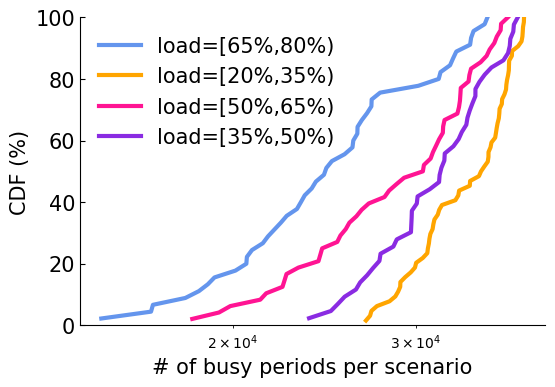

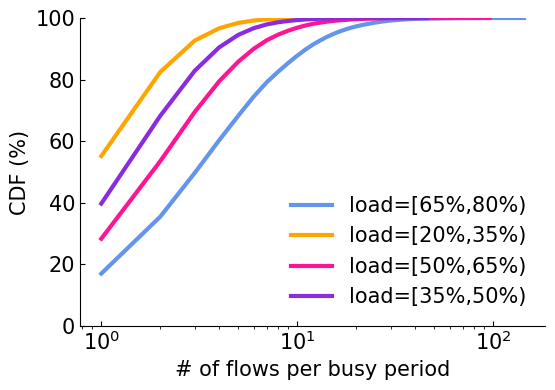

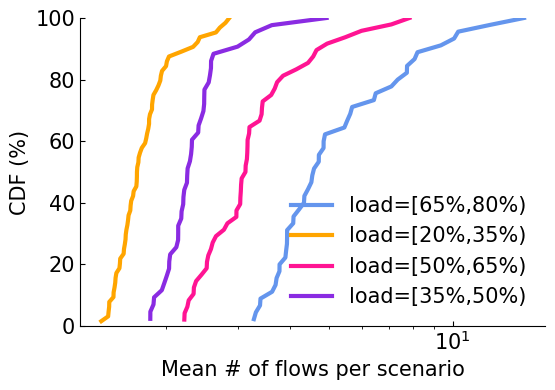

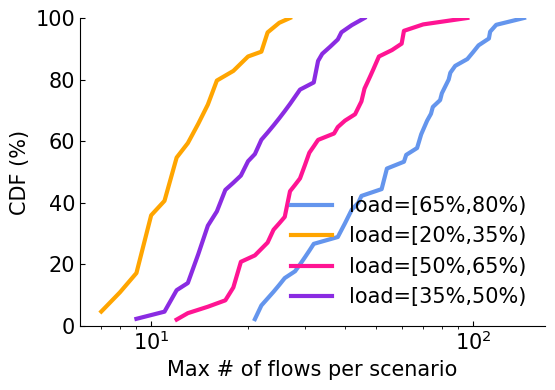

In [8]:
num_period_all=defaultdict(list)
len_per_period_all=defaultdict(list)
len_per_period_all_mean=defaultdict(list)
len_per_period_all_max=defaultdict(list)
for spec_idx,(spec,topo_type,key_tag) in enumerate(data_list):
    input_tmp=f"{dir_input}/{spec}"
    # Read the log file
    busy_periods=np.load(f'{input_tmp}/period{topo_type}.npy', allow_pickle=True)
    
    num_period_all[key_tag].append(len(busy_periods))
    
    # len_per_period = np.array([int(period[1])-int(period[0])+1 for period in busy_periods])
    len_per_period = np.array([len(period) for period in busy_periods])
    len_per_period_all[key_tag].extend(len_per_period)
    len_per_period_all_mean[key_tag].append(len_per_period.mean())
    len_per_period_all_max[key_tag].append(len_per_period.max())

legend_list=[f'{key_tag}' for key_tag in len_per_period_all.keys()]

plot_data=[np.array(num_period_all[key_tag]) for key_tag in len_per_period_all.keys()]
fig_idx=0
plot_cdf(plot_data,None,legend_list,f'# of busy periods per scenario',legend_font=15,group_size=len(legend_list),loc=2,rotate_xaxis=False,log_switch=True,fig_idx=fig_idx)
fig_idx+=1

plot_data=[np.array(len_per_period_all[key_tag]) for key_tag in len_per_period_all.keys()]
plot_cdf(plot_data,None,legend_list,f'# of flows per busy period',legend_font=15,group_size=len(legend_list),loc=4,rotate_xaxis=False,log_switch=True,fig_idx=fig_idx)
fig_idx+=1

plot_data=[np.array(len_per_period_all_mean[key_tag]) for key_tag in len_per_period_all.keys()]
plot_cdf(plot_data,None,legend_list,f'Mean # of flows per scenario',legend_font=15,group_size=len(legend_list),loc=4,rotate_xaxis=False,log_switch=True,fig_idx=fig_idx)
fig_idx+=1

plot_data=[np.array(len_per_period_all_max[key_tag]) for key_tag in len_per_period_all.keys()]
plot_cdf(plot_data,None,legend_list,f'Max # of flows per scenario',legend_font=15,group_size=len(legend_list),loc=4,rotate_xaxis=False,log_switch=True,fig_idx=fig_idx)
fig_idx+=1

In [2]:
data_path="/data2/lichenni/output_perflow/topo_512_flowsim_input_empirical_shard100_nflows1_nhosts1_nsamples1_lr10Gbps/version_0/data_list.json"
dir_input="/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_8/data_empirical"
# data_path="/data2/lichenni/output_perflow/topo_512_flowsim_input_shard2000_nflows1_nhosts1_nsamples1_lr10Gbps/version_0/data_list.json"
# dir_input="/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_8/data"
flow_size_threshold=100000000
data_list=json.load(open(data_path))
train_data_list=data_list["train"]

config_file="/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_8/spec/dctcp_sync.mix.json"
config_list=json.load(open(config_file))

n_flows_list=[]
n_links_list=[]
n_paths_per_len_list=defaultdict(list)
type_list=[]
for spec, src_dst_pair_target, topo_type, segment_id, _ in train_data_list:
    dir_input_tmp = f"{dir_input}/{spec}"
    shard=int(spec.split("/")[0])
    config=config_list[shard]
    spatial=config.get("spatial").split("/")[-1].split(".")[0]
    # if spatial!="cluster_c_2_4":
    #     continue
    size_dist=config.get("size_dist").split("/")[-1].split(".")[0]
    cluster=config.get("cluster").split("/")[-1].split(".")[0]
    max_load_val=float(config.get("max_load"))
    if max_load_val<0.35:
        max_load='load=[20%,35%)'
    elif max_load_val<0.50:
        max_load='load=[35%,50%)'
    elif max_load_val<=0.65:
        max_load='load=[50%,65%)'
    else:
        max_load='load=[65%,80%)'
    lognorm_sigma=float(config.get("lognorm_sigma"))
    type_list.append([spatial,size_dist,cluster,max_load_val,lognorm_sigma])
    
    busy_periods=np.load(
        f"{dir_input_tmp}/period{topo_type}_t{flow_size_threshold}.npy",
        allow_pickle=True,
    )
    fid=np.array(busy_periods[segment_id])
    n_flows=len(fid)
    n_flows_list.append(n_flows)
    
    link_info = np.load(
        f"{dir_input_tmp}/flow_to_path.npy",
        allow_pickle=True,
    )
    link_info = [link_info[i] for i in fid]
    link_list=np.unique(np.concatenate(link_info))
    n_links=len(link_list)
    n_links_list.append(n_links)
    
    n_links_per_path=np.array([len(x) for x in link_info])
    unique_elements, counts = np.unique(n_links_per_path, return_counts=True)
    for i in range(len(unique_elements)):
        n_paths_per_len_list[unique_elements[i]].append(counts[i])

    
    

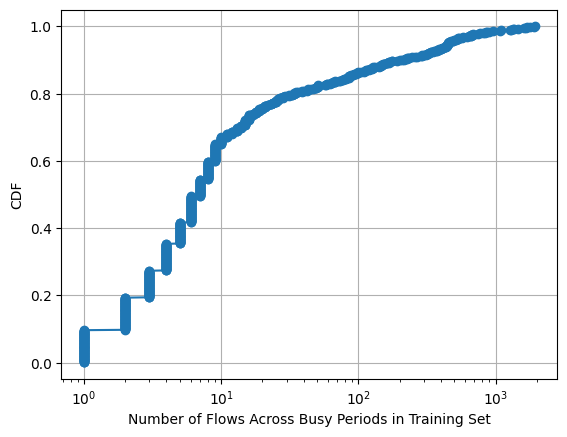

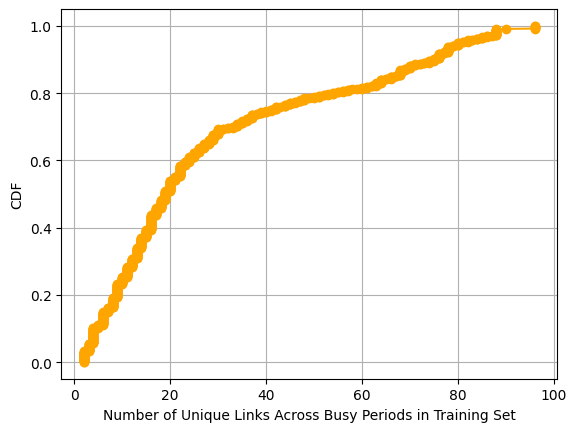

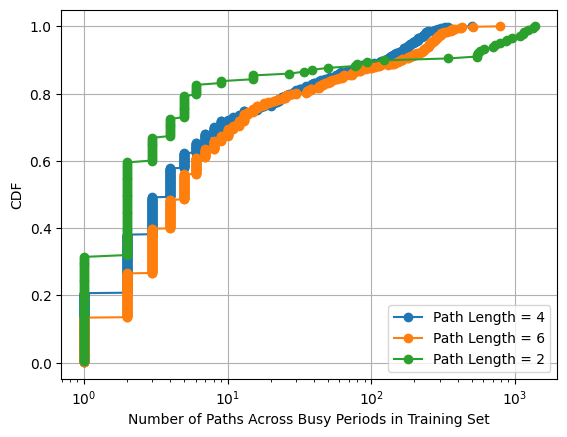

In [3]:
# 1. Plot CDF for the number of flows
n_flows_sorted = np.sort(n_flows_list)
cdf_flows = np.arange(1, len(n_flows_sorted) + 1) / len(n_flows_sorted)
plt.figure()
plt.plot(n_flows_sorted, cdf_flows, marker='o')
plt.xlabel('Number of Flows Across Busy Periods in Training Set')
plt.ylabel('CDF')
plt.grid(True)
plt.xscale('log')
plt.show()

# 2. Plot CDF for the number of links
n_links_sorted = np.sort(n_links_list)
cdf_links = np.arange(1, len(n_links_sorted) + 1) / len(n_links_sorted)
plt.figure()
plt.plot(n_links_sorted, cdf_links, marker='o', color='orange')
plt.xlabel('Number of Unique Links Across Busy Periods in Training Set')
plt.ylabel('CDF')
plt.grid(True)
plt.show()

# 3. Plot CDF of distribution of paths per length
plt.figure()
for path_len, counts in n_paths_per_len_list.items():
    sorted_counts = np.sort(counts)
    cdf_counts = np.arange(1, len(sorted_counts) + 1) / len(sorted_counts)
    plt.plot(sorted_counts, cdf_counts, label=f'Path Length = {path_len}', marker='o')
plt.xlabel('Number of Paths Across Busy Periods in Training Set')
plt.ylabel('CDF')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.show()

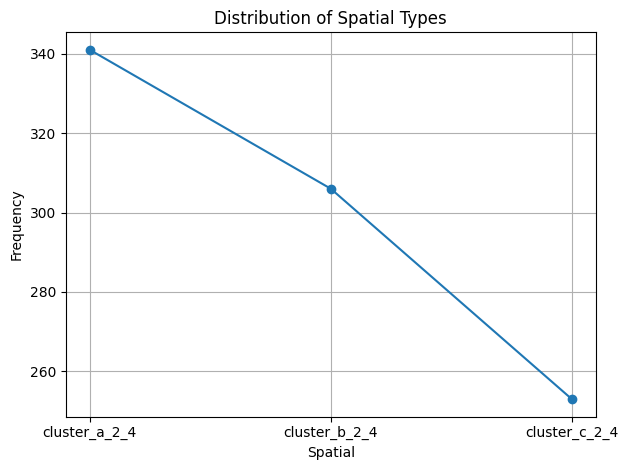

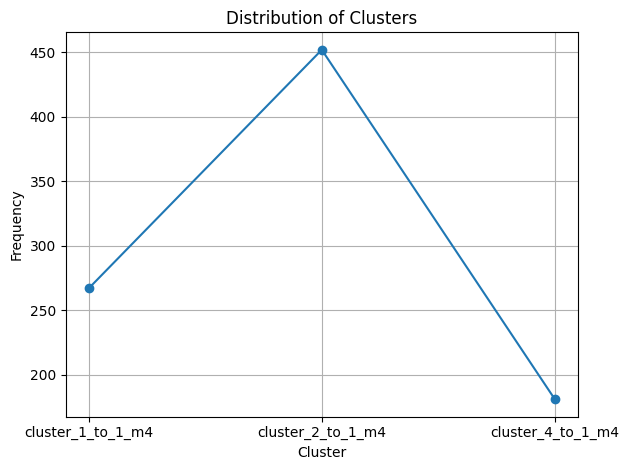

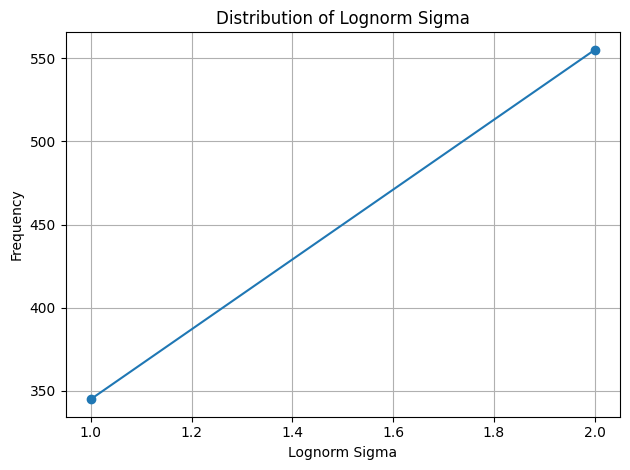

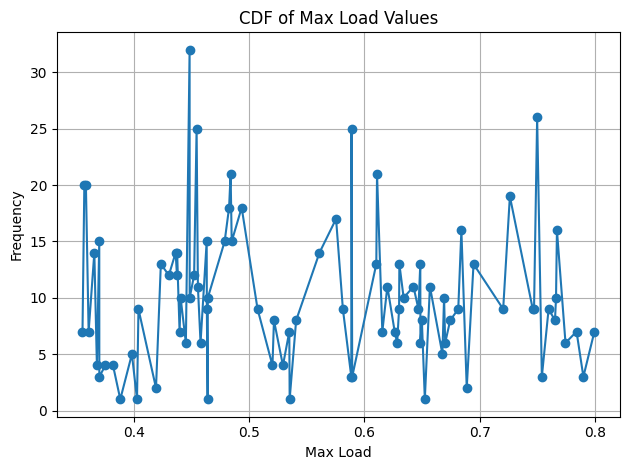

In [4]:
# Convert type_list columns to separate lists for individual plotting
spatial_list, size_dist_list, cluster_list, max_load_list, lognorm_sigma_list = zip(*type_list)

# Function for line plot of discrete distributions
def plot_discrete_line(attribute_list, title, xlabel):
    attribute_counts = Counter(attribute_list)
    labels, counts = zip(*sorted(attribute_counts.items()))  # Sort for better visual continuity
    plt.figure()
    plt.plot(labels, counts, marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Function for CDF plot of continuous distributions
def plot_cdf(attribute_list, title, xlabel):
    sorted_data = np.sort(attribute_list)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.figure()
    plt.plot(sorted_data, cdf, marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('CDF')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot discrete distributions using line plots
plot_discrete_line(spatial_list, 'Distribution of Spatial Types', 'Spatial')
plot_discrete_line(cluster_list, 'Distribution of Clusters', 'Cluster')
plot_discrete_line(lognorm_sigma_list, 'Distribution of Lognorm Sigma', 'Lognorm Sigma')

# Plot continuous distributions using CDF plots
# plot_discrete_line(size_dist_list, 'CDF of Size Distribution', 'Size Distribution')
plot_discrete_line(max_load_list, 'CDF of Max Load Values', 'Max Load')